# Математическая статистика

In [1]:
from statistics import multimode

import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
N = 14
print(f'Номер в группе {N}')

Номер в группе 14


**Задача.** Получение и визуализация выборки заданного <i><u>дискретного</u></i> распределения 

<i>Шаг 1.</i> 

Из списка дискретных случайных величин выберите случайные величины с номером $N$. 

In [3]:
variants = np.array([
    1, 4, 6, 7, 12, 27, 28, 29.5, 30, 31.9, 32, 
    39, 39.1, 39.2, 39.3, 39.4, 40, 41, 42, 50
])
freq = np.array([2, 3, 4, 5, 6, 7, 7, 5, 6, 7, 8, 10, 25, 1, 1, 1, 1, 1, 4, 1]) / 105

Визуализируем входные данные для наглядности распределения:

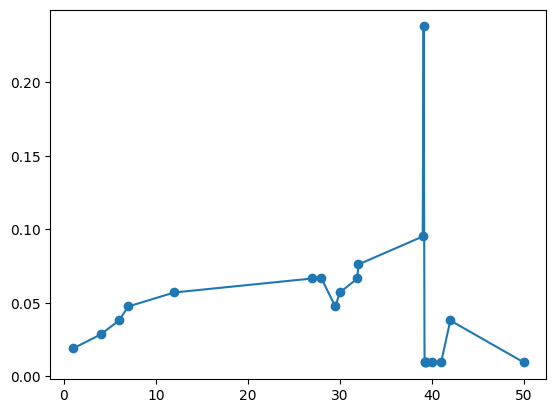

Случайная величина: Вероятностная мера


{1.0: 0.01904761904761905,
 4.0: 0.02857142857142857,
 6.0: 0.0380952380952381,
 7.0: 0.047619047619047616,
 12.0: 0.05714285714285714,
 27.0: 0.06666666666666667,
 28.0: 0.06666666666666667,
 29.5: 0.047619047619047616,
 30.0: 0.05714285714285714,
 31.9: 0.06666666666666667,
 32.0: 0.0761904761904762,
 39.0: 0.09523809523809523,
 39.1: 0.23809523809523808,
 39.2: 0.009523809523809525,
 39.3: 0.009523809523809525,
 39.4: 0.009523809523809525,
 40.0: 0.009523809523809525,
 41.0: 0.009523809523809525,
 42.0: 0.0380952380952381,
 50.0: 0.009523809523809525}

In [4]:
table = dict(zip(variants, freq))
plt.plot(variants, freq, '-o')
plt.show()

print('Случайная величина: Вероятностная мера')
table

<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [5]:
summary = sum(freq)

print(f'Сумма частот -{summary}, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.')

freq_norm = list(map(lambda p: p / summary, freq))

print(f'Снова суммируем и получаем: {sum(freq_norm)}')

distribution = sps.rv_discrete(values = (variants, freq_norm))

Сумма частот -0.9999999999999997, что не равно 1 из-за дискретности ЭВМ, поэтому выполняем нормализацию.
Снова суммируем и получаем: 1.0


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [6]:
size = 100
sample = distribution.rvs(size = size)

In [7]:
sample

array([32. , 39. , 39.1, 39.1, 39.4, 39.1, 27. , 28. , 32. , 39.2, 31.9,
       42. ,  4. ,  7. , 28. , 32. , 30. , 27. , 32. , 39.1, 30. , 32. ,
       42. , 30. , 39.1, 39.1, 27. , 39.1, 30. , 39.1,  7. , 39.4, 39.1,
       31.9, 42. ,  6. ,  7. , 39.1, 42. , 32. , 42. , 12. , 39.1,  7. ,
       30. , 27. ,  7. , 39.1, 39. , 31.9, 30. , 39.1,  6. , 27. , 27. ,
        4. , 29.5, 32. , 31.9, 27. , 39.2, 12. , 39.1, 39.1, 42. , 30. ,
       31.9,  1. , 39.1, 39.1, 39.4, 27. , 39.1, 28. ,  4. , 29.5, 39.1,
       39. , 39. ,  7. , 32. , 39.1,  7. , 27. , 39.1, 39. , 28. , 39. ,
       12. , 39.1, 39.1, 30. , 32. ,  6. , 32. , 30. , 39. , 32. , 32. ,
       39.1])

In [8]:
variants

array([ 1. ,  4. ,  6. ,  7. , 12. , 27. , 28. , 29.5, 30. , 31.9, 32. ,
       39. , 39.1, 39.2, 39.3, 39.4, 40. , 41. , 42. , 50. ])

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [9]:
from collections import Counter
from collections import OrderedDict

counter = Counter(sample)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

In [10]:
def find_median(array):
    middle = len(array) / 2.
    if (middle % 1 == 0):
        return (array[int(middle) + 1] + array[int(middle)]) / 2
    else:
        return array[int(middle)]

In [11]:
print('Объем выборки:', len(sample))
print('Минимум, максимум:', (min(sample), max(sample)))

avg = sum(sample) / size

def moment(n, length = size, array = sample):
    return np.sum(list(map(lambda x: (x - avg) ** n, array))) / length

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1))
print('Размах:', max(sample) - min(sample))

print('Ассиметрия:', moment(3) / moment(2) ** (3 / 2))
print('Эксцесс:', moment(4) / (moment(2) ** 2) - 3)

print('II момент:', moment(2))
print('III момент:', moment(3))
print('IV момент:', moment(4))

print('Медиана:', find_median(list(sample)))
print('Мода:', multimode(list(sample)))

Объем выборки: 100
Минимум, максимум: (1.0, 42.0)
Среднее: 30.03499999999999
Дисперсия: 134.22452020202022
Размах: 41.0
Ассиметрия: -1.2089634647716445
Эксцесс: 0.254616710283706
II момент: 132.88227500000002
III момент: -1851.8839117499954
IV момент: 57469.04226042305
Медиана: 34.55
Мода: [39.1]


Получаем значения через функции из пакета Stats

In [12]:
obj = sps.describe(sample)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(sample, moment = 2))
print('III момент:', sps.moment(sample, moment = 3))
print('IV момент:', sps.moment(sample, moment = 4))

mode = sps.mode(sample, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (1.0, 42.0)
Среднее: 30.035
Дисперсия: 134.22452020202027
Ассиметрия: -1.208963464771647
Эксцесс: 0.25461671028370914
II момент: 132.88227500000005
III момент: -1851.8839117499997
IV момент: 57469.04226042313
Мода: 39.1 количество: 24


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [13]:
counter

Counter({39.1: 24,
         32.0: 12,
         27.0: 9,
         30.0: 9,
         39.0: 7,
         7.0: 7,
         42.0: 6,
         31.9: 5,
         28.0: 4,
         39.4: 3,
         4.0: 3,
         6.0: 3,
         12.0: 3,
         39.2: 2,
         29.5: 2,
         1.0: 1})

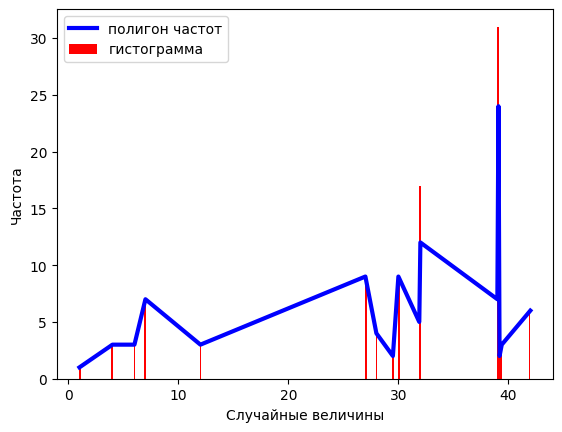

In [14]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(sample, 3 * size, color = 'red', label = 'гистограмма')
plt.legend()

plt.xlabel('Случайные величины')
plt.ylabel('Частота')

plt.show()

**Задача.** Получение и визуализация выборки заданного <i><u>непрерывного</u></i> распределения.

<i>Шаг 1.</i> 

Из списка непрерывных случйных величин выберите с номером $N$. 

In [15]:
μ = 2
σ_square = 5

print(f'Номер в группе {N}, X распределен по закону N({μ}, {σ_square})')

Номер в группе 14, X распределен по закону N(2, 5)


<i>Шаг 2.</i>

Для данных случайных величин, создайте функцию распределения вашей случайной величины (если необходимо).

In [16]:
normal = sps.norm.rvs(size = size, loc = μ, scale = np.sqrt(σ_square))
show_count = 12

print(f'Первые {show_count} значений выборки:\n', normal[:show_count])

Первые 12 значений выборки:
 [ 2.05416759  5.05358803  1.40445285 -3.09100995  1.27369291 -1.54830246
  3.2161073   1.52380515  1.84553968  1.44641237  1.12232198 -0.28053103]


<i>Шаг 3.</i>

Создайте выборку длины 100 для вашей случайной величины. Напечатайте массив частот и массив вариант

In [17]:
counter = Counter(normal)
oredered = OrderedDict(sorted(counter.items(), key = lambda t: t[0]))

variants = oredered.keys()
freq = oredered.values()

print(f'Массив вариант: \n{variants}', '\n\n' , f'Массив частот: \n{freq}')

Массив вариант: 
odict_keys([-3.2674001162539934, -3.0910099544975127, -2.4463823434712264, -2.0322049997677816, -1.9097957974823347, -1.6242337875922939, -1.5483024608502705, -1.23728108906618, -1.227306915649042, -1.2226765867047806, -1.1784140462814792, -1.15821389832176, -0.9453863216811689, -0.7809422851219106, -0.6218147927448308, -0.4128637902310599, -0.35688741241424715, -0.2805310282714868, -0.17778921109436663, -0.125423873596481, 0.09337521589974629, 0.33011355138450793, 0.34692279592228337, 0.43875453067056935, 0.4575147599730387, 0.6898729680581865, 0.8334936018258396, 0.91041192180828, 1.0199739948603055, 1.1223219809025724, 1.1778671705602735, 1.2736929060158118, 1.2919868710227478, 1.4044528493440485, 1.44641237281475, 1.5180056404132, 1.523805152745861, 1.6137106720762393, 1.6458815459211644, 1.688112871239292, 1.7773956528656025, 1.8455396817976826, 1.8538913933248435, 1.8779269384180834, 1.8958582723926867, 1.9312194699487868, 2.0541675888261772, 2.0868496292866237, 

<i>Шаг 4.</i>

Опишите вашу выборку: объем, экстремальные статистики, медиана, мода, размах, среднее, дисперсия, эксцесс и асимметрия. Сравните с результатами калькуляции функциями из пакета Stats https://docs.scipy.org/doc/scipy/reference/stats.html

In [18]:
print('Объем выборки:', len(normal))
print('Минимум, максимум:', (min(normal), max(normal)))

avg = sum(normal) / size

print('Среднее:', avg)
print('Дисперсия:', moment(2, length = size - 1, array = normal))
print('Размах:', max(normal) - min(normal))

print('Ассиметрия:', moment(3, array = normal) / moment(2, array = normal) ** (3 / 2))
print('Эксцесс:', moment(4, array = normal) / (moment(2, array = normal) ** 2) - 3)

print('II момент:', moment(2, array = normal))
print('III момент:', moment(3, array = normal))
print('IV момент:', moment(4, array = normal))

print('Медиана:', find_median(list(normal)))
print('Мода (ограничение на 3 значения):', multimode(list(normal))[:3])

Объем выборки: 100
Минимум, максимум: (-3.2674001162539934, 7.403377624203818)
Среднее: 1.9224391893953479
Дисперсия: 4.568007385595462
Размах: 10.670777740457812
Ассиметрия: -0.10895440817308612
Эксцесс: 0.12265364882048013
II момент: 4.522327311739507
III момент: -1.0478226789109542
IV момент: 63.86277721233813
Медиана: 2.0236711187800975
Мода (ограничение на 3 значения): [2.0541675888261772, 5.053588028340227, 1.4044528493440485]


Получаем значения через функции из пакета Stats

In [19]:
obj = sps.describe(normal)

print('Объем выборки:', obj.nobs)
print('Минимум, максимум:', obj.minmax)
print('Среднее:', obj.mean)
print('Дисперсия:', obj.variance)

print('Ассиметрия:', obj.skewness)
print('Эксцесс:', obj.kurtosis)

print('II момент:', sps.moment(normal, moment = 2))
print('III момент:', sps.moment(normal, moment = 3))
print('IV момент:', sps.moment(normal, moment = 4))

mode = sps.mode(normal, keepdims = False)

print(f'Мода: {mode.mode} количество: {mode.count}')

Объем выборки: 100
Минимум, максимум: (-3.2674001162539934, 7.403377624203818)
Среднее: 1.922439189395347
Дисперсия: 4.568007385595463
Ассиметрия: -0.10895440817308476
Эксцесс: 0.1226536488204788
II момент: 4.522327311739508
III момент: -1.0478226789109413
IV момент: 63.86277721233813
Мода: -3.2674001162539934 количество: 1


Как мы видим, все характеристики совпадают

<i>Шаг 5.</i>

Создайте полигон частот и гистограмму для каждой выборки


Список количества каждой случайной величины в выборке

In [20]:
counter

Counter({2.0541675888261772: 1,
         5.053588028340227: 1,
         1.4044528493440485: 1,
         -3.0910099544975127: 1,
         1.2736929060158118: 1,
         -1.5483024608502705: 1,
         3.216107301511401: 1,
         1.523805152745861: 1,
         1.8455396817976826: 1,
         1.44641237281475: 1,
         1.1223219809025724: 1,
         -0.2805310282714868: 1,
         3.1582577954604485: 1,
         3.999449082066993: 1,
         2.715570671367307: 1,
         0.4575147599730387: 1,
         -1.1784140462814792: 1,
         2.2843082063036473: 1,
         4.132704324085798: 1,
         1.9312194699487868: 1,
         1.1778671705602735: 1,
         2.809000717368726: 1,
         0.8334936018258396: 1,
         4.239249968361548: 1,
         2.5527429285886236: 1,
         0.91041192180828: 1,
         3.4802984936905137: 1,
         0.09337521589974629: 1,
         0.43875453067056935: 1,
         2.8130867487163167: 1,
         2.223166957945331: 1,
         1.8958

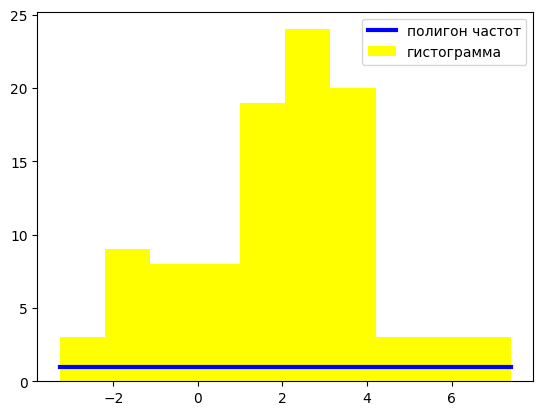

In [21]:
plt.figure()
plt.plot(variants, freq, color = 'blue', lw = 3, label = 'полигон частот')
plt.hist(normal, 10, color = 'yellow', label = 'гистограмма')
plt.legend()
plt.show()